<a href="https://colab.research.google.com/github/rajivsresearch/Corona/blob/master/GTA_Corona_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
!pip install geopandas

In [100]:
!ls

drive  sample_data


In [0]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
shapefile1 = 'drive/My Drive/Data/Ontario Map/MUNIC_BND_LOWER_AND_SINGLE.shp'
shapefile2 = 'drive/My Drive/Data/Ontario Map/MUNIC_BND_UPPER_AND_DIST.shp'

In [0]:
gdf1 = gpd.read_file(shapefile1)
gdf2 = gpd.read_file(shapefile2)

In [0]:
gdf = pd.concat([gdf1, gdf2], sort=False)

In [121]:
gdf.head(1)

,OGF_ID,SUBTYPE,STYPE_NUM,MUN_NAME,MUNID,MAH_CODE,EXTENT_T,ASSESS_C,NAME_PREF,NAME_SHORT,UT_ASSESS,UPPER_TIER,GUNT_DES,GEO_UPD_DT,EFF_DATE,geometry
0,67916062,Lower Tier Municipality,95,TOWNSHIP OF SOUTH STORMONT,1009,71618,Mainland,406,TOWNSHIP OF,SOUTH STORMONT,None,"UNITED COUNTIES OF STORMONT, DUNDAS AND GLENGARRY",2563,20190809142913,20190809141120,"POLYGON ((-74.70928 45.08543, -74.70934 45.085..."


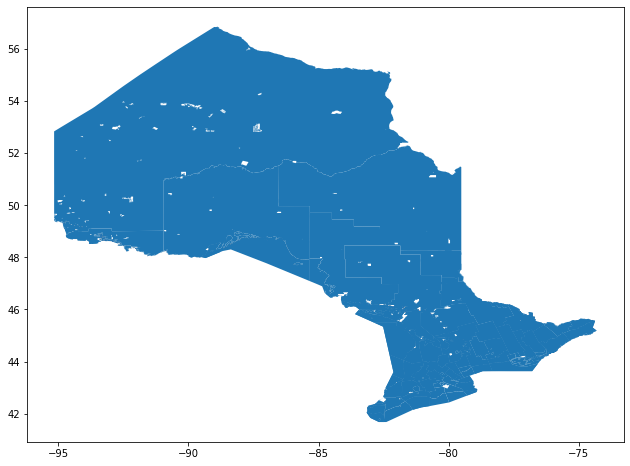

In [105]:
gdf.plot(figsize=(12,8))

In [131]:
gdf.loc[gdf['MUN_NAME'].str.contains('TORONTO'), ['MUN_NAME', 'geometry', 'EXTENT_T']]

,MUN_NAME,geometry,EXTENT_T
135,CITY OF TORONTO,"POLYGON ((-79.15166 43.81436, -79.15156 43.814...",Mainland
375,CITY OF TORONTO,"MULTIPOLYGON (((-79.35248 43.63372, -79.35201 ...",Islands
675,CITY OF TORONTO,"POLYGON ((-79.11523 43.79460, -79.00344 43.520...",Water


In [0]:
cases = pd.read_excel('drive/My Drive/Data/Ontario Map/Corona Ontario.xlsx')

In [108]:
cases[['Municipality', 'New Cases']].head(1)

,Municipality,New Cases
0,CITY OF TORONTO,1


In [0]:
cases = cases.groupby('Municipality').sum().reset_index()

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


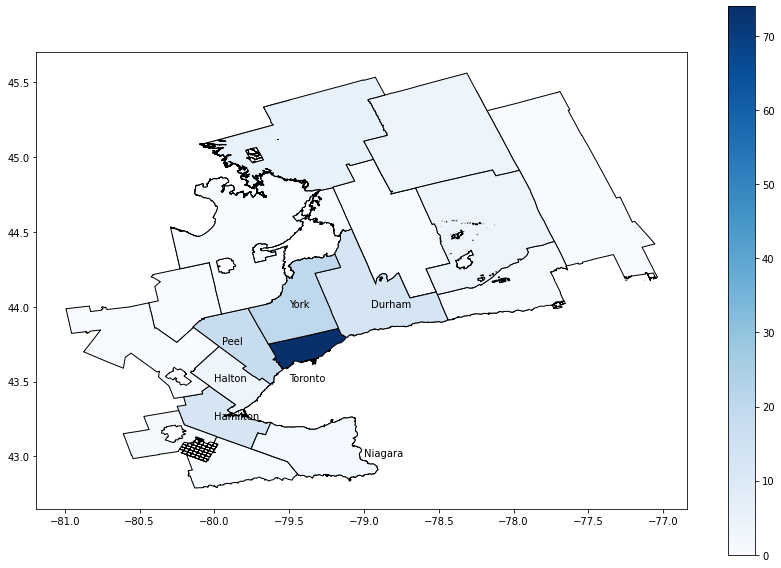

In [145]:
gdf.loc[gdf['EXTENT_T'] == 'Mainland',['MUN_NAME', 'geometry']].merge(cases[['Municipality', 'New Cases']], 
how='left', left_on='MUN_NAME', right_on='Municipality').cx[-78:-80.0,:45].fillna(0).plot(column='New Cases', 
cmap='Blues', figsize=(12,8), missing_kwds={'color': 'white'}, legend=True, edgecolor="black")
plt.annotate('Toronto', (-79.5,43.5))
plt.annotate('York', (-79.5,44))
plt.annotate('Peel', (-79.95,43.75))
plt.annotate('Durham', (-78.95,44.0))
plt.annotate('Halton', (-80.0,43.5))
plt.annotate('Hamilton', (-80.0,43.25))
plt.annotate('Niagara', (-79,43))
plt.tight_layout()
plt.savefig('GTA.png')